In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\Admin\\Downloads\\heart_2020_cleaned.csv\\heart_diseas.csv")

In [3]:
# Drop irrelevant or high-cardinality columns
df.drop(['SkinCancer', 'KidneyDisease', 'AgeCategory', 'GenHealth', 'Race'], axis=1, inplace=True)

In [4]:
# Convert target variable 'HeartDisease' to binary
df['HeartDisease'] = df['HeartDisease'].map({'Yes': 1, 'No': 0})

In [5]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,PhysicalActivity,SleepTime,Asthma
0,0,16.60,Yes,No,No,3.0,30.0,No,Female,Yes,Yes,5.0,Yes
1,0,20.34,No,No,Yes,0.0,0.0,No,Female,No,Yes,7.0,No
2,0,26.58,Yes,No,No,20.0,30.0,No,Male,Yes,Yes,8.0,Yes
3,0,24.21,No,No,No,0.0,0.0,No,Female,No,No,6.0,No
4,0,23.71,No,No,No,28.0,0.0,Yes,Female,No,Yes,8.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,Yes,No,No,7.0,0.0,Yes,Male,Yes,No,6.0,Yes
319791,0,29.84,Yes,No,No,0.0,0.0,No,Male,No,Yes,5.0,Yes
319792,0,24.24,No,No,No,0.0,0.0,No,Female,No,Yes,6.0,No
319793,0,32.81,No,No,No,0.0,0.0,No,Female,No,No,12.0,No


In [6]:
# Map 'Diabetic' column to numeric
diabetes_map = {
    'No': 0,
    'Yes': 1,
    'No, borderline diabetes': 2,
    'Yes (during pregnancy)': 3
}
df['Diabetic'] = df['Diabetic'].map(diabetes_map)

In [7]:
# Convert 'Sex' to numeric
df['Sex'] = df['Sex'].map({'Male': 1, 'Female': 0})

In [8]:
df = df.replace({'Yes' : 1, 'No' : 0})

C:\Users\Admin\AppData\Local\Temp\ipykernel_26436\2416949182.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'Yes' : 1, 'No' : 0})


In [9]:
df.dropna(inplace = True)

In [10]:
x = df.drop('HeartDisease', axis = 1)
y = df['HeartDisease']

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 42)

In [12]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 1000)
lr.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [13]:
y_pred = lr.predict(x_test)

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
acc = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression model:", round(acc * 100, 2), "%")

 Accuracy of Logistic Regression model: 91.45 %


In [15]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[116290    641]
 [ 10298    689]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96    116931
           1       0.52      0.06      0.11     10987

    accuracy                           0.91    127918
   macro avg       0.72      0.53      0.53    127918
weighted avg       0.88      0.91      0.88    127918



C:\Users\Admin\AppData\Local\Temp\ipykernel_26436\2502416839.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HeartDisease', data=df, palette='Set2')


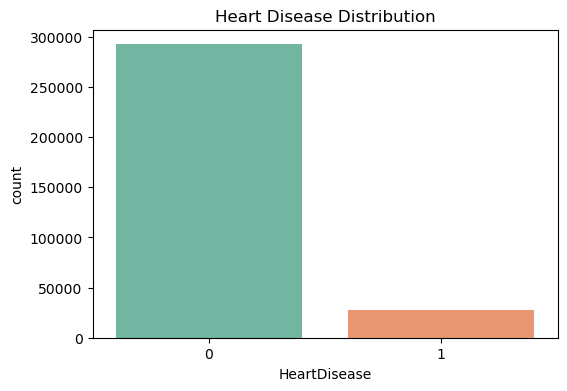

In [16]:
plt.figure(figsize = (6, 4))
sns.countplot(x='HeartDisease', data=df, palette='Set2')
plt.title('Heart Disease Distribution')
plt.show()